In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data.csv', sep = ';')
print(df.shape)

(1460, 81)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
i = 0
for x in (df.count() < 1460).values.tolist():
    if x == True:
        i = i+1
i

19

In [5]:
a = 1
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
for i in df.columns:
    a = a+1
    if a < 15:
           col1.append(i)
    if a >= 15 and a < 30:
           col2.append(i)
    if a >=30 and a < 45:
           col3.append(i)
    if a >=45 and a < 60:
           col4.append(i) 
    if a >=60 and a < 75:
           col5.append(i)
    if a >=75 and a <= 81:
           col6.append(i)        

In [6]:
df[col1].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge


In [7]:
df[col2].head()

,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual
0,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd
1,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA
2,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd
3,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA
4,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd


In [8]:
df[col3].head()

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical
0,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr
1,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr
2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr
3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr
4,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr


In [9]:
df[col4].head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu
0,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN
1,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA
2,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA
3,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd
4,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA


In [10]:
df[col5].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC
0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN
1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN
2,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN
3,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN
4,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN


In [11]:
df[col6].head()

,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,NaN,NaN,0,2,2008,WD,Normal
1,NaN,NaN,0,5,2007,WD,Normal
2,NaN,NaN,0,9,2008,WD,Normal
3,NaN,NaN,0,2,2006,WD,Abnorml
4,NaN,NaN,0,12,2008,WD,Normal


In [12]:
# Стратегия работы с пропусками. Где менее 100 значений - удаляем.
# Где категорийные признаки не количественные - заполняем значением NA
# Где значения количественные - заполняем средним
# Ординарные - перекодируем числовыми значениями

In [84]:
df.SaleCategory.value_counts()

0    1025
1     435
Name: SaleCategory, dtype: int64

In [13]:
columns_to_drop = ['Alley', 'PoolQC', 'MiscFeature']

In [14]:
df = df.drop(columns_to_drop, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [16]:
columns_to_fill_na = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', \
                      'BsmtFinType1', 'FireplaceQu', 'GarageType', 'BsmtFinType2', \
                      'Electrical', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
columns_to_fill_mean = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
len(columns_to_fill_na)+len(columns_to_fill_mean)

16

In [18]:
def fill_by_na (df, columns):
    for x in columns:
        df[x] = df[x].fillna('NA')

In [19]:
def fill_by_mean (df, columns):
    for x in columns:
        df[x] = df[x].fillna(df[x].mean())

In [20]:
fill_by_na(df, columns_to_fill_na)

In [21]:
fill_by_mean (df, columns_to_fill_mean)

In [22]:
i = 0
for x in (df.count() < 1460).values.tolist():
    if x == True:
        i = i+1
i

0

In [23]:
columns_to_recode = ['ExterQual', 'ExterCond', 'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', \
                     'FireplaceQu', 'GarageQual', 'GarageCond']

In [24]:
dct = {
'Ex': 5,
'Gd': 4,
'TA': 3,
'Fa': 2,
'Po': 1,
'NA': 0
}

In [25]:
columns_to_recode

['ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond']

In [26]:
for i in columns_to_recode:
    df[i] = df[i].map(dct)

In [27]:
df[columns_to_recode].head()

,ExterQual,ExterCond,BsmtCond,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,3,4,5,4,0,3,3
1,3,3,3,4,5,3,3,3,3
2,4,3,3,4,5,4,3,3,3
3,3,3,4,3,4,4,4,3,3
4,4,3,3,4,5,4,3,3,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [29]:
df['MSSubClass'] = df['MSSubClass'].astype('str')
df['YearBuilt'] = df['YearBuilt'].astype('str')
df['YearRemodAdd'] = df['YearRemodAdd'].astype('str')

In [30]:
# Все категориальные признаки не ординарные перекодируем  WOE 

In [31]:
def get_woe_v1(df_train, col, target_col):
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[df_train[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    #df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_train, df_test

In [32]:
y = df['SaleCategory'].copy()

In [33]:
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [34]:
col = [] 
for x in df.columns:
      if df[x].dtype == 'object':
             col.append(x)

In [35]:
col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [36]:
target = 'SaleCategory'

In [37]:
for col_get_prob in col:
    get_woe_v1(df, col_get_prob, target)

In [38]:
df.shape

(1460, 112)

In [39]:
correct_cols = []
for x in df.columns.tolist():
    if x not in col:
        correct_cols.append(x)
        


In [40]:
df = df[correct_cols]
df = df.fillna(0)

In [41]:
corr_matrix = df.corr()
corr =  corr_matrix[target].sort_values(ascending=False) 
corr

SaleCategory        1.000000
OverallQual         0.658386
ExterQual           0.602048
GrLivArea           0.586293
Neighborhood_woe    0.585793
KitchenQual         0.576516
YearBuilt_woe       0.519630
GarageArea          0.512544
GarageCars          0.511790
TotalBsmtSF         0.492566
FullBath            0.490005
1stFlrSF            0.488095
BsmtQual            0.472205
Foundation_woe      0.454454
TotRmsAbvGrd        0.438496
GarageFinish_woe    0.437616
YearRemodAdd_woe    0.423768
GarageYrBlt         0.413747
FireplaceQu         0.413621
Exterior2nd_woe     0.397742
Exterior1st_woe     0.395197
GarageType_woe      0.391011
BsmtFinType1_woe    0.389076
HeatingQC           0.382271
MasVnrType_woe      0.374664
MSSubClass_woe      0.370890
Fireplaces          0.360984
MasVnrArea          0.332687
OpenPorchSF         0.304405
SaleType_woe        0.282132
                      ...   
Condition1_woe      0.157119
BsmtCond            0.155478
Electrical_woe      0.149472
CentralAir_woe

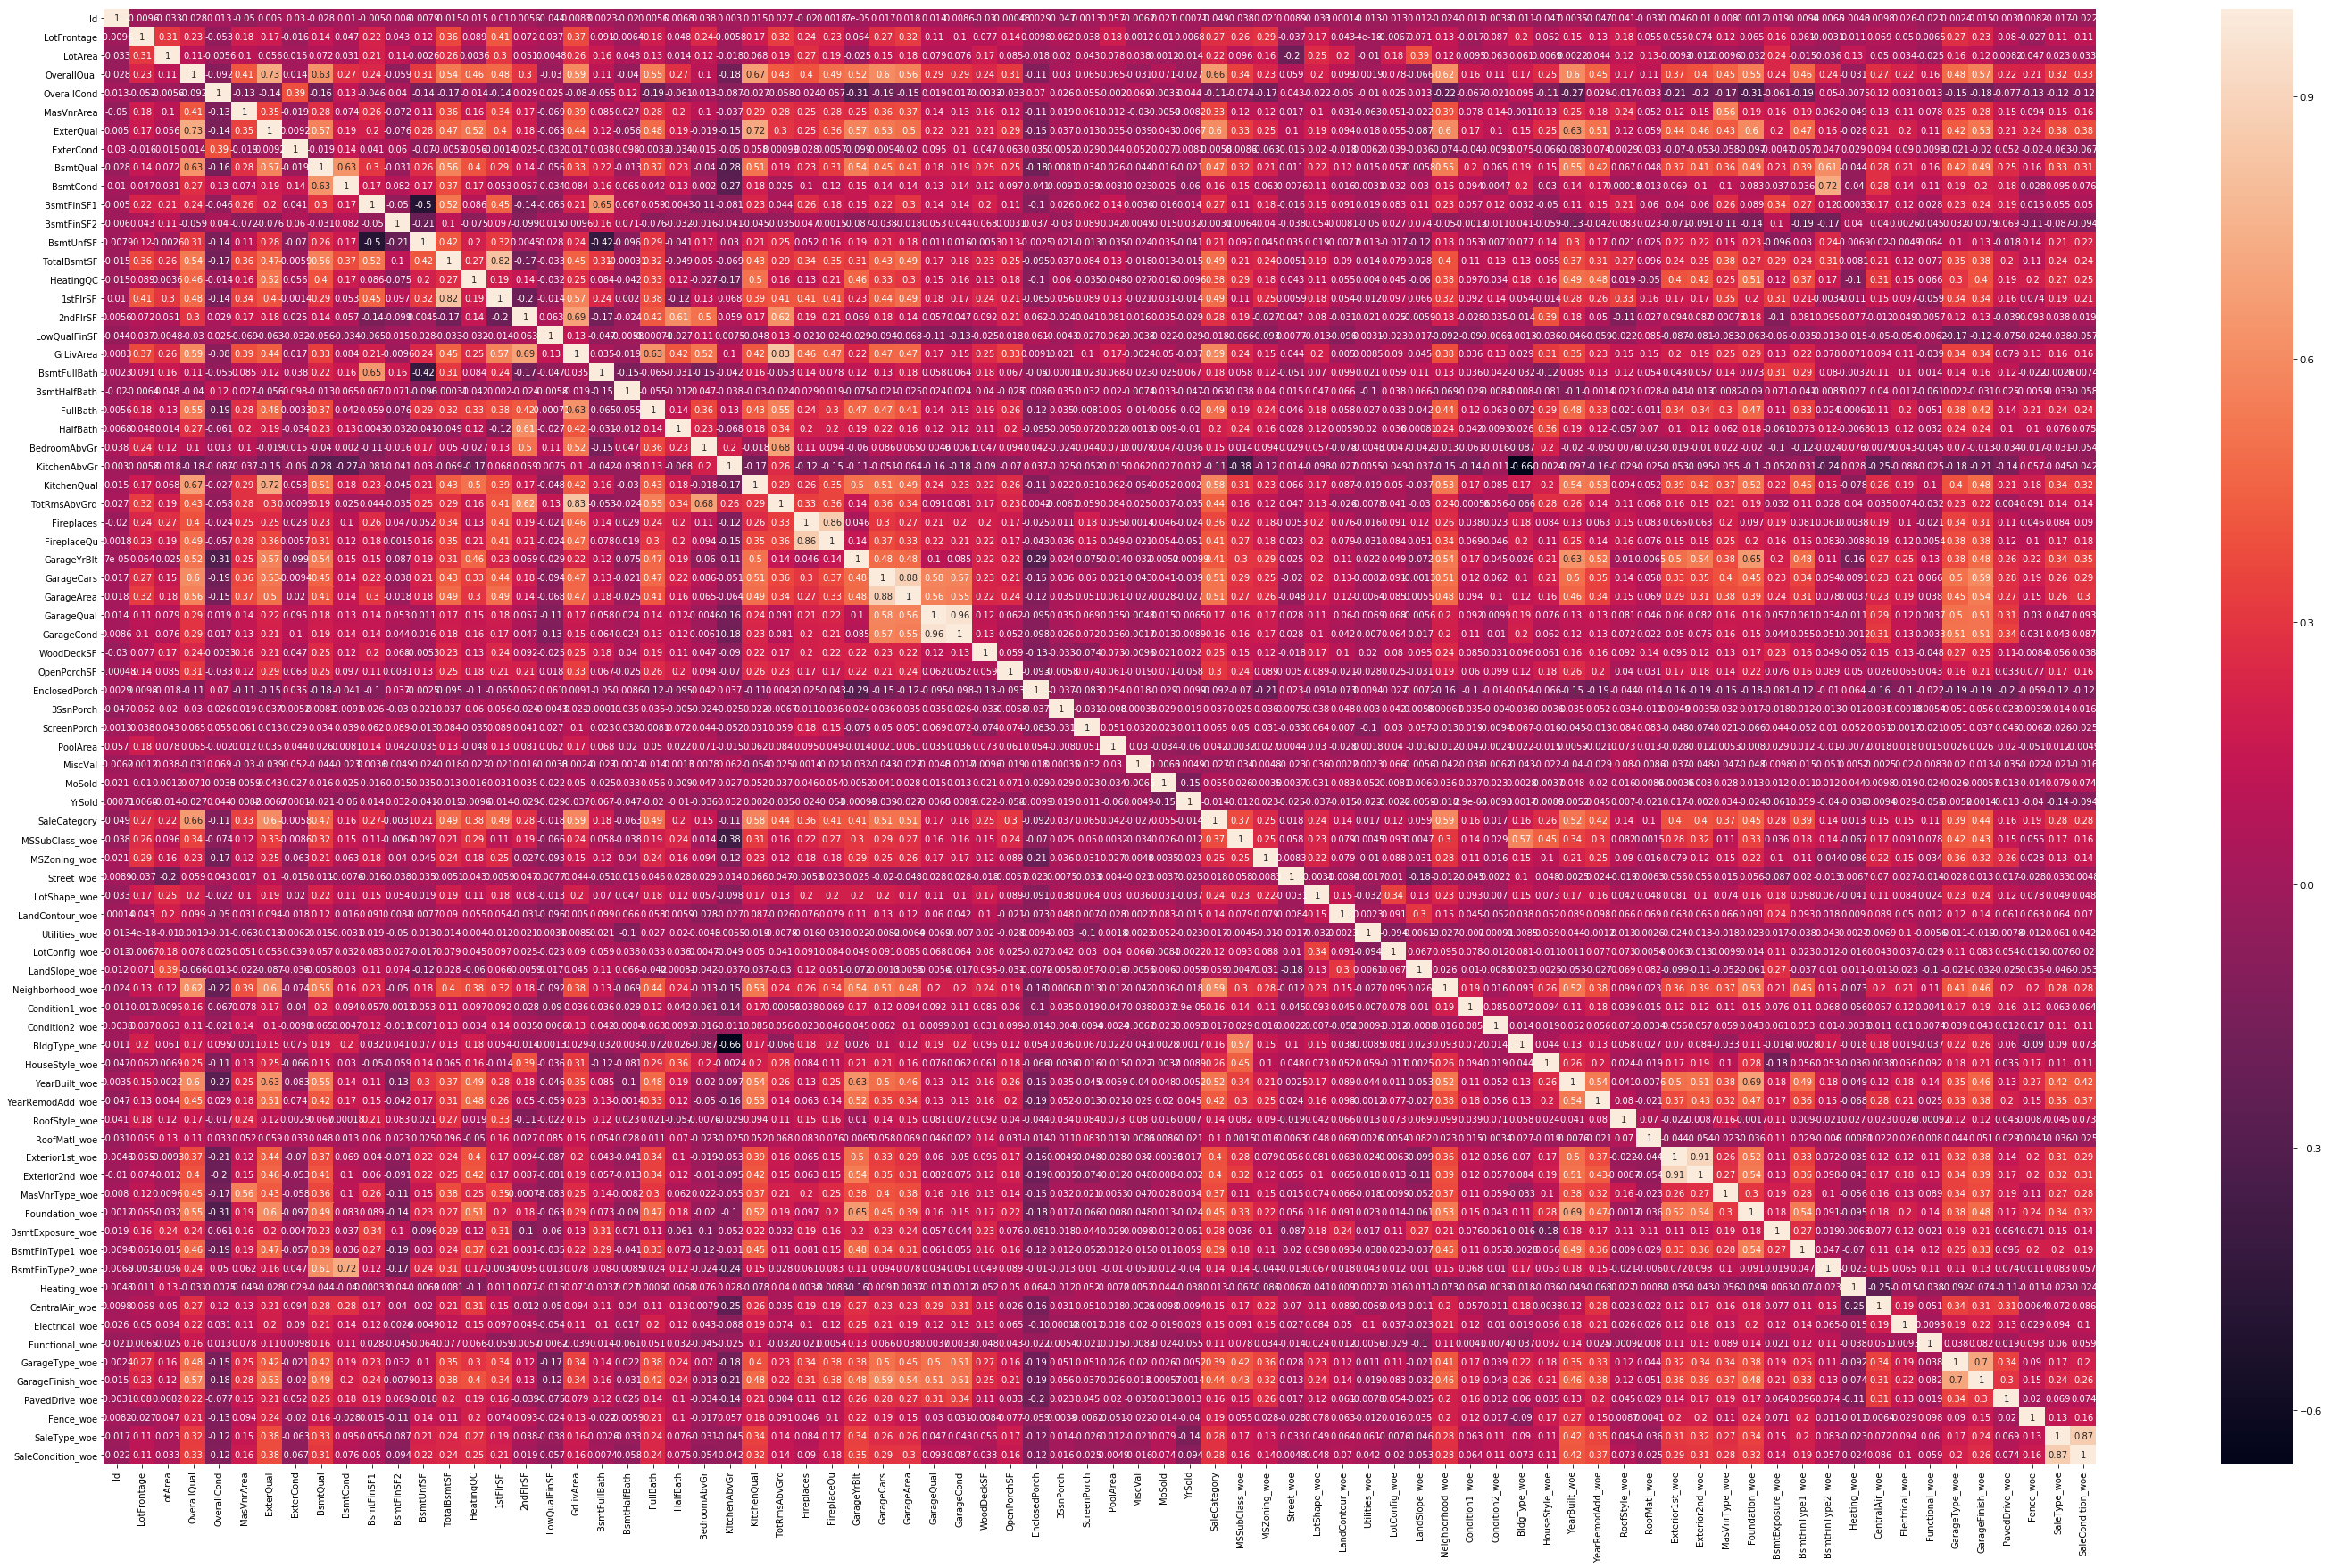

In [42]:
plt.subplots(figsize=(50,30))
sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [43]:
y = df.SaleCategory
X = df.drop('SaleCategory', axis=1)

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Text(0,0.5,'explained_variance_ratio_')

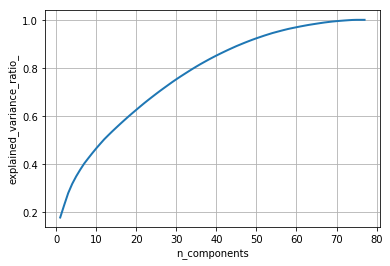

In [46]:
pca = PCA().fit(X)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [47]:
pca = PCA(n_components=15)

In [48]:
X_pca = pca.fit_transform(X)

In [49]:
X_pca = pd.DataFrame(X_pca)

In [50]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
0     1460 non-null float64
1     1460 non-null float64
2     1460 non-null float64
3     1460 non-null float64
4     1460 non-null float64
5     1460 non-null float64
6     1460 non-null float64
7     1460 non-null float64
8     1460 non-null float64
9     1460 non-null float64
10    1460 non-null float64
11    1460 non-null float64
12    1460 non-null float64
13    1460 non-null float64
14    1460 non-null float64
dtypes: float64(15)
memory usage: 171.2 KB


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [52]:
num_folds = 5
seed = 7

In [53]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [54]:
LogReg = LogisticRegression()
results = cross_val_score(LogReg, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 92.877% (1.002%)


In [55]:
from sklearn.svm import SVC

In [56]:
svecm = SVC()
results = cross_val_score(svecm, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 92.192% (1.491%)


In [62]:
from sklearn.tree import DecisionTreeClassifier
destree = DecisionTreeClassifier()
results = cross_val_score(destree, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 88.630% (1.711%)


In [63]:
import xgboost 

In [64]:
xgb = xgboost.XGBClassifier(max_depth=5, random_seed = 42, n_jobs=10)
results = cross_val_score(xgb, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 93.219% (1.214%)


In [ ]:
#сравним качество с исходным набором признаков

In [65]:
results = cross_val_score(LogReg, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 93.219% (0.664%)


In [66]:
results = cross_val_score(svecm, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 92.877% (0.731%)


In [70]:
results = cross_val_score(destree, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 89.247% (2.586%)


In [71]:
results = cross_val_score(xgb, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 94.247% (0.877%)


In [61]:
from sklearn.metrics import classification_report

In [76]:
test_size = 0.2
seed = 7
model = LogReg
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.93      0.96      0.94       197
          1       0.91      0.85      0.88        95

avg / total       0.92      0.92      0.92       292



In [77]:
test_size = 0.2
seed = 7
model = LogReg
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.95      0.95       197
          1       0.89      0.89      0.89        95

avg / total       0.93      0.93      0.93       292



In [78]:
test_size = 0.2
seed = 7
model = svecm
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.90      0.96      0.93       197
          1       0.90      0.79      0.84        95

avg / total       0.90      0.90      0.90       292



In [79]:
test_size = 0.2
seed = 7
model = destree
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.93      0.94      0.94       197
          1       0.88      0.86      0.87        95

avg / total       0.92      0.92      0.92       292



In [80]:
test_size = 0.2
seed = 7
model = destree
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.92      0.95      0.93       197
          1       0.89      0.82      0.85        95

avg / total       0.91      0.91      0.91       292



In [81]:
test_size = 0.2
seed = 7
model = destree
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       197
          1       0.90      0.85      0.88        95

avg / total       0.92      0.92      0.92       292



In [82]:
test_size = 0.2
seed = 7
model = xgb
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       197
          1       0.91      0.86      0.89        95

avg / total       0.93      0.93      0.93       292



In [83]:
test_size = 0.2
seed = 7
model = xgb
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       197
          1       0.93      0.89      0.91        95

avg / total       0.94      0.95      0.94       292

